**1. Import Required Packages**

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns

import warnings



In [3]:
# Suppress all warnings
warnings.filterwarnings("ignore")
# Display all columns in a dataset
pd.set_option('display.max_columns',None)

**2. Load Data**

In [4]:
sector_data = pd.read_csv('/Users/xonkar/Desktop/Data_Projects/Options/Technology/TechFlow0109.csv')
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996


**4. Feature Engineering: Target Vairable**

In [5]:
sector_data['1D Performance'] = ((sector_data['1D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100
sector_data['3D Performance'] = ((sector_data['3D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100
sector_data['5D Performance'] = ((sector_data['5D Price'] - sector_data['Spot']) / sector_data['Spot']) * 100


In [6]:
sector_data['Distance'] = ((sector_data['Strike'] - sector_data['Spot']) / sector_data['Spot']) * 100

In [7]:
sector_data 

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006,0.752842,5.005721,5.815799,3.460421
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.647135,2.086297,3.926828,9.168730
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004,1.856711,5.710993,13.336324,-3.963122
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570232,2.010551,3.849717,-9.844852
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570138,2.010459,3.849624,-9.844933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001,2.724171,4.229085,3.441790,4.507768
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,10.941086
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,-0.535578
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996,3.106065,7.272732,8.469691,6.060606


In [8]:
# Define conditions
conditions = [
    (sector_data['CallPut'] == 'CALL') & (sector_data['Spot'] < sector_data['Strike']) & (sector_data['Distance'] > 1),  # OTM CALL
    (sector_data['CallPut'] == 'PUT') & (sector_data['Spot'] > sector_data['Strike']) & (sector_data['Distance'] < -1),  # OTM PUT
    (np.abs(sector_data['Distance']) <= 1),  # ATM
    (sector_data['CallPut'] == 'CALL') & (sector_data['Spot'] > sector_data['Strike']) & (sector_data['Distance'] < 1),  # ITM CALL
    (sector_data['CallPut'] == 'PUT') & (sector_data['Spot'] < sector_data['Strike']) & (sector_data['Distance'] > -1)   # ITM PUT
]

# Define corresponding values
values = ['OTM', 'OTM', 'ATM', 'ITM', 'ITM']

# Create 'ITM_OTM_ATM' column based on conditions
sector_data['Money'] = np.select(conditions, values, default='Unknown')


In [9]:
sector_data.groupby('Money').size()

Money
ATM    155
ITM    659
OTM    489
dtype: int64

In [10]:
# Get the list of column names in the DataFrame
columns = sector_data.columns.tolist()

# Remove 'Money' column from its current position
columns.remove('Money')

# Insert 'Money' column next to 'CallPut' column
new_index = columns.index('CallPut') 
columns.insert(new_index, 'Money')

# Reassign the columns of the DataFrame in the new order
sector_data = sector_data[columns]


In [11]:
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.750,A,OTM,CALL,235.0,227.1400,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.850006,238.509995,240.350006,0.752842,5.005721,5.815799,3.460421
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.900,B,OTM,CALL,121.0,110.8376,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.647135,2.086297,3.926828,9.168730
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.460,B,ITM,CALL,150.0,156.1900,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.089996,165.110001,177.020004,1.856711,5.710993,13.336324,-3.963122
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.850,B,ITM,CALL,100.0,110.9199,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570232,2.010551,3.849717,-9.844852
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.878,B,ITM,CALL,100.0,110.9200,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.879997,113.150002,115.190002,3.570138,2.010459,3.849624,-9.844933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.900,B,OTM,CALL,150.0,143.5300,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.440002,149.600006,148.470001,2.724171,4.229085,3.441790,4.507768
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.152,B,OTM,CALL,145.0,130.7000,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,10.941086
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.248,BB,ATM,PUT,130.0,130.7000,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.729996,133.410004,135.940002,0.022950,2.073453,4.009183,-0.535578
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.780,A,ITM,PUT,70.0,66.0000,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.050003,70.800003,71.589996,3.106065,7.272732,8.469691,6.060606


In [12]:
# List of columns you want to round
columns_to_round = ['Price','Spot','Distance','1D Price','3D Price','5D Price', '1D Performance','3D Performance','5D Performance']

# Apply the round function to selected columns
sector_data[columns_to_round] = sector_data[columns_to_round].apply(lambda x: round(x, 2))

In [13]:
sector_data

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
0,2023-01-09,3:59:57 PM,MSFT,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,2023-02-17,WHITE,0.33,39,F,STOCK,Information Technology,F,F,1676733000000,16193,2023-01-10,2023-01-12,2023-01-16,228.85,238.51,240.35,0.75,5.01,5.82,3.46
1,2023-01-09,3:59:44 PM,BABA,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,2023-02-10,YELLOW,0.58,32,F,STOCK,Information Technology,F,F,291151000000,23,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.65,2.09,3.93,9.17
2,2023-01-09,3:58:22 PM,NVDA,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,2023-01-13,MAGENTA,0.74,4,F,STOCK,Information Technology,F,T,365531000000,3918,2023-01-10,2023-01-12,2023-01-16,159.09,165.11,177.02,1.86,5.71,13.34,-3.96
3,2023-01-09,3:58:16 PM,BABA,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84
4,2023-01-09,3:58:05 PM,BABA,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,2023-02-17,WHITE,0.59,39,F,STOCK,Information Technology,F,F,291151000000,9468,2023-01-10,2023-01-12,2023-01-16,114.88,113.15,115.19,3.57,2.01,3.85,-9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2023-01-09,9:30:02 AM,CRM,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,2024-01-19,YELLOW,0.39,375,F,STOCK,Information Technology,F,F,140510000000,755,2023-01-10,2023-01-12,2023-01-16,147.44,149.60,148.47,2.72,4.23,3.44,4.51
1299,2023-01-09,9:30:00 AM,AAPL,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,2023-06-16,WHITE,0.32,157,F,STOCK,Information Technology,F,F,2062010000000,13919,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,10.94
1300,2023-01-09,9:30:00 AM,AAPL,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,2023-06-16,WHITE,0.33,157,F,STOCK,Information Technology,F,F,2062010000000,71667,2023-01-10,2023-01-12,2023-01-16,130.73,133.41,135.94,0.02,2.07,4.01,-0.54
1301,2023-01-09,9:30:00 AM,AMD,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,2023-01-20,WHITE,0.49,11,F,STOCK,Information Technology,F,F,103126000000,61125,2023-01-10,2023-01-12,2023-01-16,68.05,70.80,71.59,3.11,7.27,8.47,6.06


In [14]:
sector_data.describe()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
count,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,831.721412,23.087475,146.280123,129.300384,1.354432e+06,0.591358,87.839601,6.000706e+11,7317.810437,129.743170,133.201443,135.978358,0.588127,2.928281,5.270967,18.490629
std,1516.502288,34.497039,101.125413,91.405175,2.848694e+06,0.495703,144.422600,7.873026e+11,12745.999311,90.893624,95.198603,96.410166,2.715707,3.990783,6.079894,49.565312
min,80.000000,0.200000,2.500000,5.060000,1.000000e+05,0.000000,4.000000,0.000000e+00,0.000000,5.750000,6.160000,6.180000,-5.000000,-15.170000,-19.790000,-90.770000
25%,206.000000,4.455000,95.000000,69.795000,1.727360e+05,0.350000,11.000000,4.648400e+10,614.500000,70.030000,71.800000,75.100000,-0.960000,0.940000,2.605000,-2.180000
50%,398.000000,9.750000,130.000000,122.400000,3.512340e+05,0.520000,39.000000,2.458990e+11,2657.000000,126.930000,131.630000,130.620000,0.010000,2.430000,4.110000,2.180000
75%,845.500000,28.240000,165.000000,150.860000,1.175628e+06,0.665000,101.000000,1.036536e+12,8919.500000,154.325000,156.750000,159.800000,1.700000,4.130000,7.120000,25.895000
max,22046.000000,303.400000,925.000000,917.800000,3.112090e+07,4.910000,892.000000,2.062010e+12,100711.000000,915.780000,1024.310000,1070.000000,23.300000,38.860000,65.330000,532.910000


In [15]:
# Create a pivot table
pivot_table_df = pd.pivot_table(sector_data, 
                                values='Premium', 
                                index='Sector', 
                                columns=['CallPut', 'Side'], 
                                aggfunc='sum', 
                                fill_value=0)

# Calculate the sum of all values in the pivot table
total_sum = pivot_table_df.values.sum()

# Normalize the pivot table to percentages
pivot_table_df = (pivot_table_df / total_sum) * 100
pivot_table_df = pivot_table_df.round()

# Display the normalized pivot table
pivot_table_df


CallPut                CALL                       PUT                     
Side                      A   AA    B   BB    N     A   AA     B   BB    N
Sector                                                                    
Information Technology  6.0  0.0  6.0  1.0  1.0  35.0  0.0  47.0  0.0  5.0

In [16]:
# Group by 'CallPut' and calculate the sum of 'Premium'
callput_ratio = sector_data.groupby(['CallPut'])['Premium'].sum().reset_index()

# Create a bar chart for CallPut ratio
fig1 = px.bar(callput_ratio, x='CallPut', y='Premium', title='Call-Put Ratio')

# Group by 'CallPut' and calculate the average of '5D Performance'
avg_5d_performance = sector_data.groupby(['CallPut'])['5D Performance'].mean().reset_index()

# Create a bar chart for average '5D Performance' by CallPut
fig2 = px.bar(avg_5d_performance, x='CallPut', y='5D Performance', title='Average 5D Performance by CallPut')

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Call-Put Ratio', 'Average 5D Performance by CallPut'))

# Add bar chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)

# Add bar chart to the second subplot
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout
fig.update_layout(title='CallPut Analysis')

# Show the plot
fig.show()


In [17]:
# Group by 'Side' and calculate the sum of 'Premium'
side_ratio = sector_data.groupby(['Side'])['Premium'].sum().reset_index()

# Create a bar chart for Side ratio
fig1 = px.bar(side_ratio, x='Side', y='Premium', title='Call-Put Ratio')

# Group by 'Side' and calculate the average of '5D Performance'
avg_5d_performance = sector_data.groupby(['Side'])['5D Performance'].mean().reset_index()

# Create a bar chart for average '5D Performance' by Side
fig2 = px.bar(avg_5d_performance, x='Side', y='5D Performance', title='Average 5D Performance by Side')

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Side by Premium', 'Average 5D Performance by Side'))

# Add bar chart to the first subplot
fig.add_trace(fig1.data[0], row=1, col=1)

# Add bar chart to the second subplot
fig.add_trace(fig2.data[0], row=1, col=2)

# Update layout
fig.update_layout(title='Side Analysis')

# Show the plot
fig.show()


In [18]:
# import plotly.express as px

# # Group by 'Side' and 'CallPut', then calculate the mean of 'Dte'
# mean_dte_by_side = sector_data.groupby(['Side', 'CallPut'])['Dte'].mean().reset_index()

# # Create a bar chart using Plotly Express with facet_col='CallPut'
# fig = px.bar(mean_dte_by_side, x='Side', y='Dte', color='CallPut', 
#              title='Mean Dte by Side and CallPut', 
#              color_discrete_map={'CALL': 'green', 'PUT': 'red'},
#              facet_col='CallPut', 
#              labels={'CallPut': 'Type'})

# # Show the plot
# fig.show()


In [19]:

# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = sector_data.groupby(['CallPut', 'Money', 'Side'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Side', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()


In [20]:

# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = sector_data.groupby(['CallPut', 'Money', 'Type'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Type', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()


In [21]:
sector_data['Symbol'].unique()


array(['MSFT', 'BABA', 'NVDA', 'AVGO', 'AAPL', 'QCOM', 'OLED', 'UMC',
       'BILI', 'UBER', 'MSTR', 'AMD', 'T', 'SQ', 'COIN', 'AMAT', 'INTC',
       'PANW', 'ABNB', 'ROK', 'ASML', 'MU', 'BILL', 'ADBE', 'CRM', 'CRWD',
       'ETSY', 'NOW', 'SNOW', 'SWKS', 'TSM', 'AMKR', 'VZ', 'DDOG', 'RAMP',
       'NET', 'SNAP', 'WB', 'SPLK', 'ZS', 'DOCU', 'ZM', 'SHOP', 'OKTA',
       'IBM', 'ENPH', 'ADP', 'WK', 'FTNT', 'CSIQ', 'WDAY', 'HOOD', 'AMBA',
       'STX', 'TMUS', 'TTWO', 'KLAC', 'MDB', 'FSLR', 'ENV', 'MBLY',
       'APPS', 'ORCL', 'TEAM', 'CSCO', 'MARA', 'MELI', 'DASH', 'PI', 'EA',
       'TTD', 'TWLO', 'TXN', 'U', 'BIDU', 'FTDR', 'CARS', 'AEHR', 'MRVL',
       'ACN', 'WOLF', 'VNET', 'IRM', 'CLFD'], dtype=object)

In [22]:
sector_data['Symbol'].nunique()



84

In [23]:
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [24]:
# Inspect some rows containing duplicates as needed
sector_data[sector_data.duplicated()].head()

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance


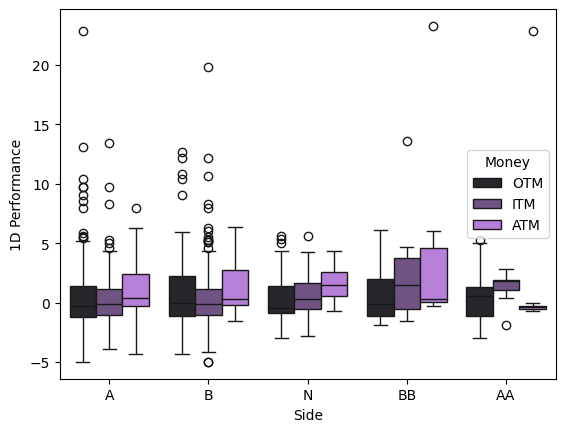

In [25]:
ax = sns.boxplot(x="Side", y="1D Performance", data=sector_data, color="#B971E7", hue = 'Money')

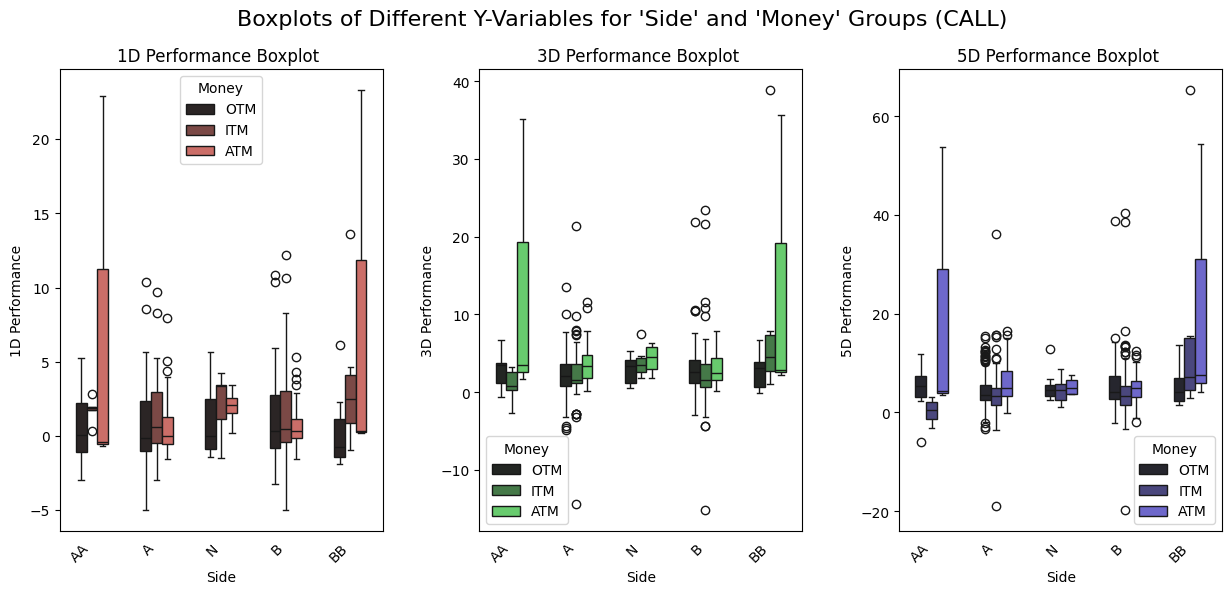

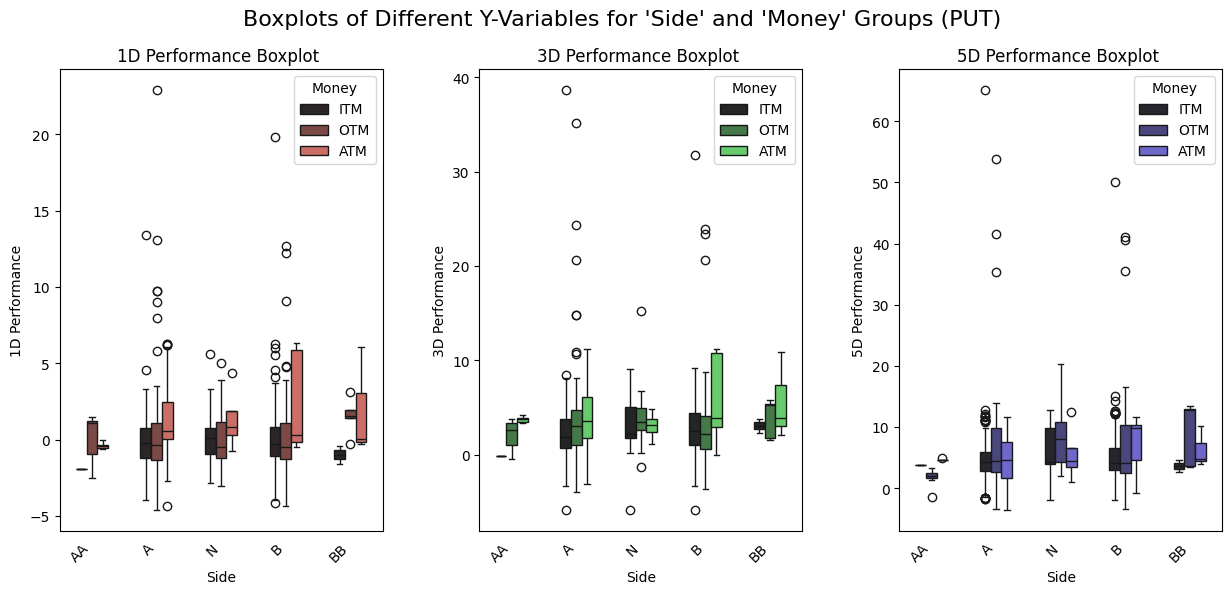

In [26]:
# Assuming your DataFrame is called `sector_data`
# Specify the y-variables you want to plot (replace with actual column names)
y_vars = ["1D Performance", "3D Performance", "5D Performance"]

# Prepare a list of colors for aesthetics and clarity
colors = sns.color_palette("hls", len(y_vars))

# Define your desired order of sides
ordered_sides = ["AA", "A", "N", "B", "BB"]

# Create separate figures and subplots for CALL and PUT
for callput in ["CALL", "PUT"]:
    fig, axes = plt.subplots(1, len(y_vars), figsize=(15, 6))  # Adjust figsize as needed

    # Iterate through each subplot and y-variable, creating boxplots
    for i, y_var in enumerate(y_vars):
        filtered_data = sector_data[(sector_data["Side"].isin(ordered_sides)) & (sector_data["CallPut"] == callput)]

        sns.boxplot(
            x="Side",
            y=y_var,
            hue="Money",
            data=filtered_data,
            order=ordered_sides,  # Specify order
            color=colors[i],
            width=0.5,
            ax=axes[i]
        )

        # Rotate x-axis labels for better readability if needed
        plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha="right")

        # Set titles and adjust spacing (customize titles as needed)
        axes[i].set_title(f"{y_var} Boxplot ")
        axes[i].tick_params(bottom=False)  # Remove unneeded ticks

    # Adjust overall layout and spacing
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing as desired
    plt.suptitle(f"Boxplots of Different Y-Variables for 'Side' and 'Money' Groups ({callput})", fontsize=16)  # Add overall title
    plt.show()  # Show the plot for each CALL and PUT



In [27]:
# # Define the desired order for the 'Side' column
# side_order = ['AA', 'A', 'N', 'B', 'BB']

# # Reorder the 'Side' column based on the desired order
# sector_data['Side'] = pd.Categorical(sector_data['Side'], categories=side_order, ordered=True)

# # Set figure and axes (adjust figsize as needed)
# fig, axes = plt.subplots(2, 2, figsize=(22, 12))

# # Define categories for filtering and plotting
# categories = ['ITM', 'ATM', 'OTM']  # Adjust if needed

# # Create separate plots for CALL and PUT, positive and negative returns (using direct indexing)
# for callput in ["CALL", "PUT"]:
#     for performance in ["Positive", "Negative"]:
#         performance_index = 0 if performance == "Positive" else 1
#         callput_index = 0 if callput == "CALL" else 1
#         filtered_data = sector_data[(sector_data["CallPut"] == callput) &
#                                    ((sector_data['1D Performance'] > 0) if performance == "Positive" else (sector_data['1D Performance'] < 0))]

#         ax = axes[performance_index, callput_index]
#         sns.histplot(data=filtered_data, x='Side', hue='Money', discrete=1,
#                     hue_order=categories, multiple='dodge', shrink=.4, ax=ax)
#         ax.set_title(f"{callput} - {performance} Return: Strike Condition Histogram", fontsize='14')

# # Adjust layout and display
# plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing as desired
# fig.suptitle("Strike Condition Histograms by Call/Put, 1D Performance, and Money", fontsize=16)
# plt.show()


In [28]:
import plotly.express as px

# Define the desired order for the 'Side' column
side_order = ['AA', 'A', 'N', 'B', 'BB']

# Reorder the 'Side' column based on the desired order
sector_data['Side'] = pd.Categorical(sector_data['Side'], categories=side_order, ordered=True)

# Define categories for filtering and plotting
categories = ['ITM', 'ATM', 'OTM']  # Adjust if needed

# Create separate plots for CALL and PUT, positive and negative returns
for callput in ["CALL", "PUT"]:
    for performance in ["Positive", "Negative"]:
        filtered_data = sector_data[(sector_data["CallPut"] == callput) &
                                    ((sector_data['1D Performance'] > 0) if performance == "Positive" else (sector_data['1D Performance'] < 0))]

        # Create a grouped bar chart
        fig = px.histogram(filtered_data, x='Side', color='Money', 
                           category_orders={'Side': side_order},
                           color_discrete_sequence=px.colors.qualitative.Set1,
                           barmode='group', title=f"{callput} - {performance} Return: Strike Condition Histogram")

        # Show the plot
        fig.show()


In [29]:
sector_data.groupby('Side').count()

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance
Side,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
A,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575,575
N,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
B,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588,588
BB,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [30]:
# Group by 'Side', 'CallPut', and 'Money', then calculate the mean of 'Dte'
mean_dte_by_side_money = sector_data.groupby(['Side', 'CallPut', 'Money'])['Dte'].mean().reset_index()

# Create a bar chart using Plotly Express with facet_col='Money'
fig = px.bar(mean_dte_by_side_money, x='Side', y='Dte', color='CallPut', 
             title='Mean Dte by Side, CallPut, and Money', 
             color_discrete_map={'CALL': 'green', 'PUT': 'red'},
             facet_col='Money', 
             labels={'CallPut': 'Type'})

# Show the plot
fig.show()


In [31]:
sector_data.loc[sector_data['CallPut'] == 'CALL', '5D Performance'].mean()


4.941358695652174

In [32]:
sector_data.loc[sector_data['CallPut'] == 'PUT', '5D Performance'].mean()

5.513235685752331

In [33]:
# # Create scatterplot of `Premium` versus `1D Performance`, comparing CALL and PUT options
# plt.figure(figsize=(16, 9))
# sns.scatterplot(data=sector_data, x='Dte', y='1D Performance', hue='CallPut', alpha=0.4)

# # Add horizontal lines for average call and put performance, and baseline
# plt.axhline(y=1.08, color='green', label='Average Call Performance', ls='--')
# plt.axhline(y=0.22, color='red', label='Average Put Performance', ls='--')
# plt.axhline(y=0, color='grey', label='Baseline', ls='--')

# # Add legend and title
# plt.legend()
# plt.title('Premium vs. 1D Performance with Average Performance Lines', fontsize=14)
# plt.show()


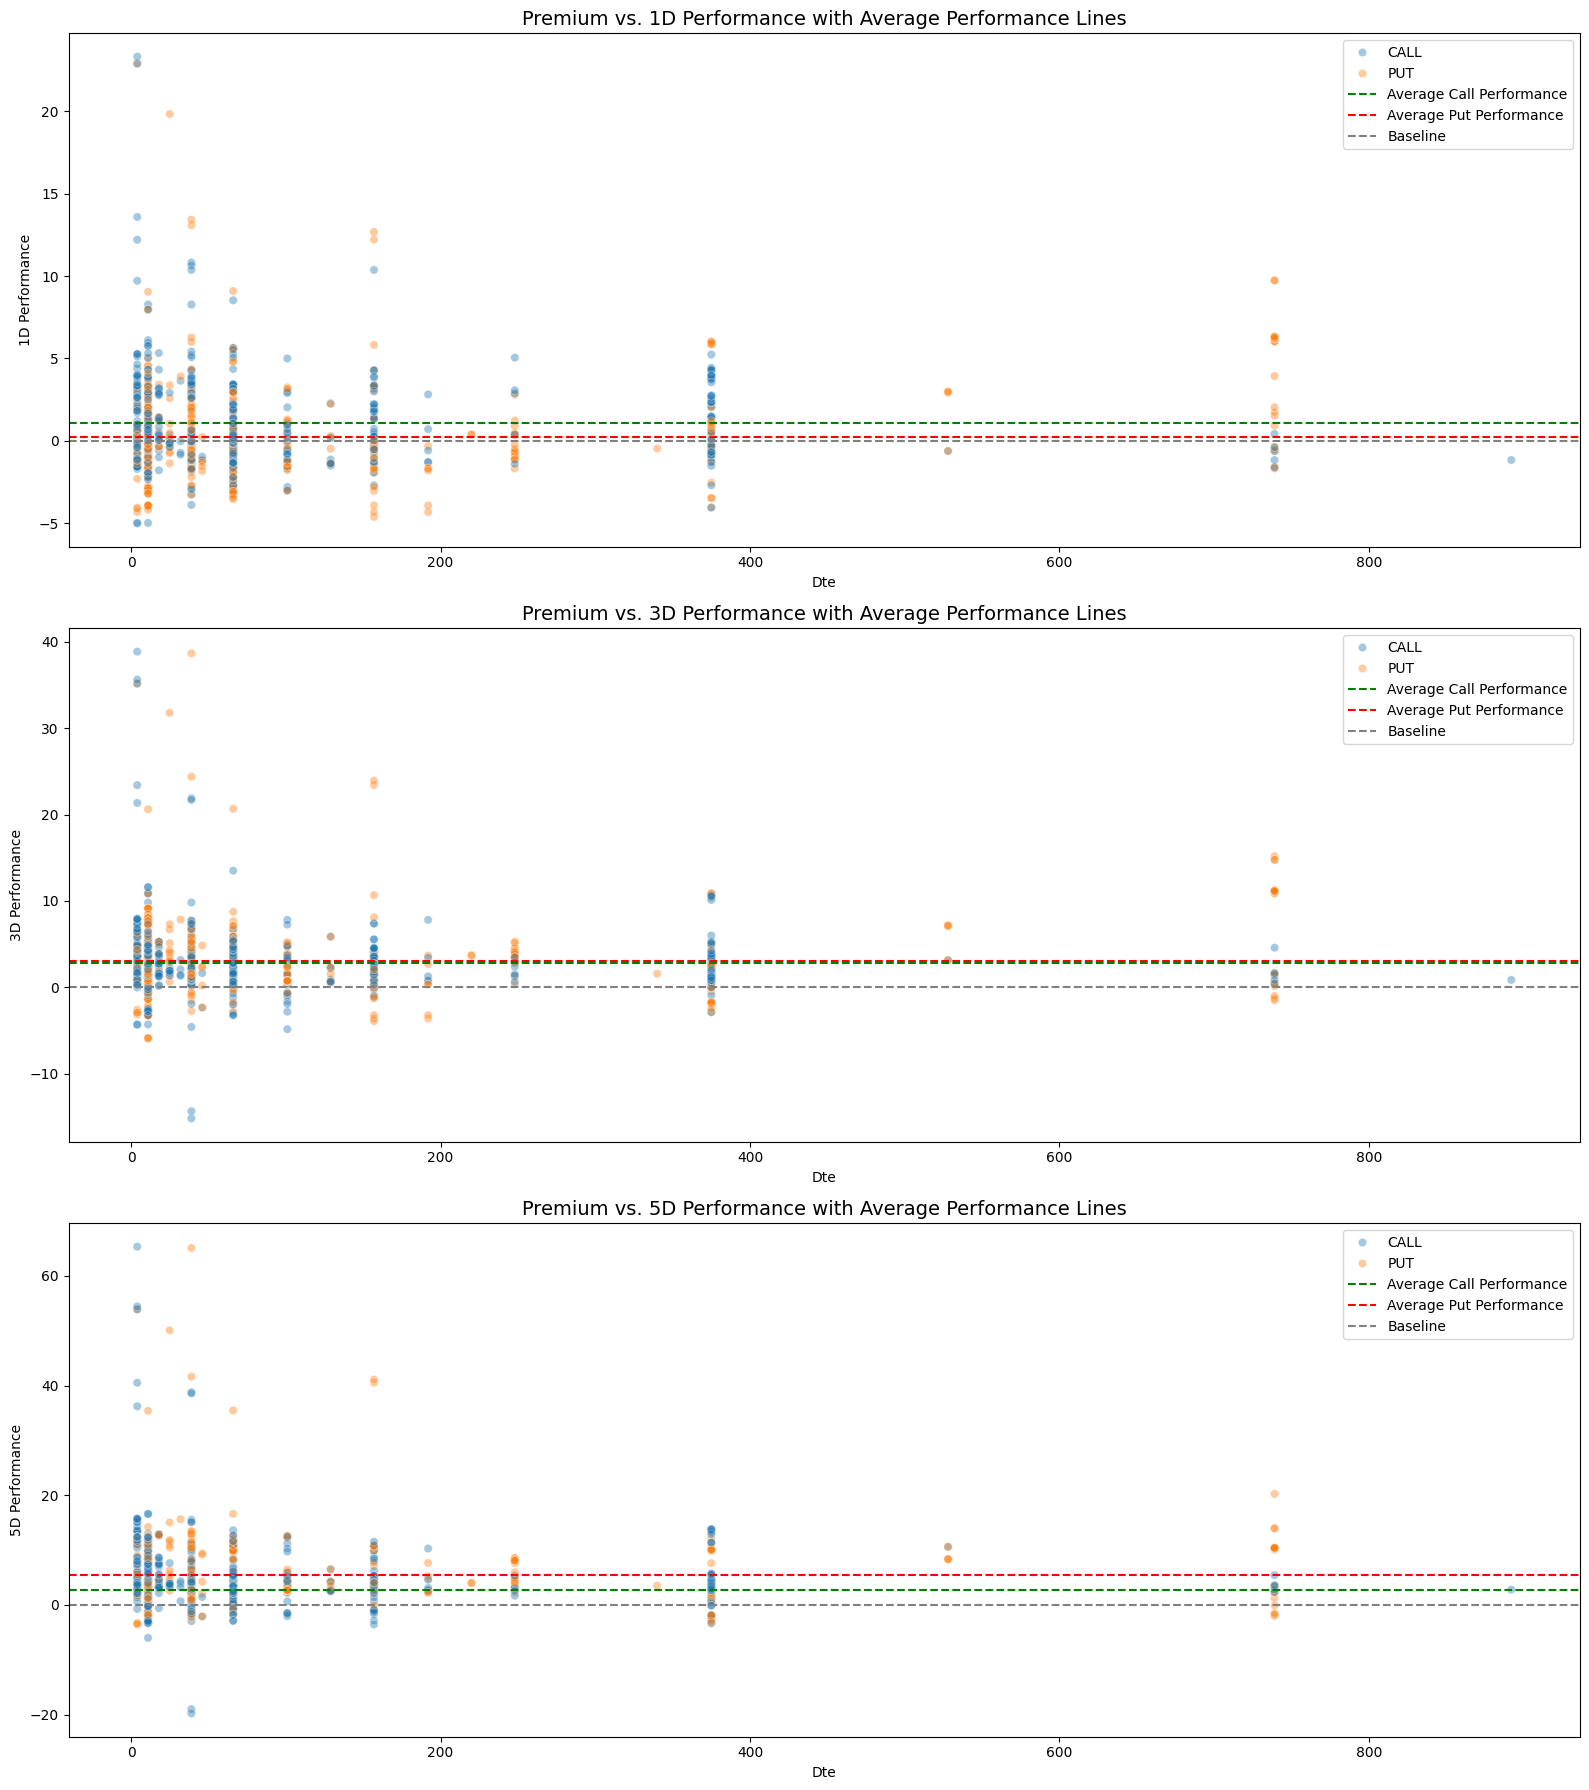

In [34]:
# Create scatterplots for Premium vs. Performance metrics
plt.figure(figsize=(16, 18))

# Scatterplot for 1D Performance
plt.subplot(3, 1, 1)
sns.scatterplot(data=sector_data, x='Dte', y='1D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=1.08, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=0.22, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 1D Performance with Average Performance Lines', fontsize=14)

# Scatterplot for 3D Performance
plt.subplot(3, 1, 2)
sns.scatterplot(data=sector_data, x='Dte', y='3D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=2.79, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=3.02, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 3D Performance with Average Performance Lines', fontsize=14)

# Scatterplot for 5D Performance
plt.subplot(3, 1, 3)
sns.scatterplot(data=sector_data, x='Dte', y='5D Performance', hue='CallPut', alpha=0.4)
plt.axhline(y=2.79, color='green', label='Average Call Performance', ls='--')
plt.axhline(y=5.51, color='red', label='Average Put Performance', ls='--')
plt.axhline(y=0, color='grey', label='Baseline', ls='--')
plt.legend()
plt.title('Premium vs. 5D Performance with Average Performance Lines', fontsize=14)

plt.tight_layout()
plt.show()




**Very long Dte Call and Put has opposite effect on 1D performance**


In [35]:
sector_data.groupby(['CallPut', 'Color'])['5D Performance'].mean()

CallPut  Color  
CALL     #FF0000    7.000000
         MAGENTA    8.809024
         WHITE      4.812517
         YELLOW     3.330448
PUT      #FF0000    8.786667
         MAGENTA    5.679000
         WHITE      5.216322
         YELLOW     6.011281
Name: 5D Performance, dtype: float64

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

In [36]:

# Define a custom function to assign values based on conditions
def assign_value(x):
    if x < 0:
        return 'negative'
    elif x > 0:
        return 'positive'
    else:
        return np.nan

# Apply the function to the specified columns
sector_data['1PN'] = sector_data['1D Performance'].apply(assign_value)
sector_data['3PN'] = sector_data['3D Performance'].apply(assign_value)
sector_data['5PN'] = sector_data['5D Performance'].apply(assign_value)

In [37]:
# Assuming 'CreatedDate' is a column in sector_data containing datetime values

# Convert 'CreatedDate' column to datetime if it's not already in datetime format
sector_data['CreatedDate'] = pd.to_datetime(sector_data['CreatedDate'])

# Map weekday numbers to weekday names
weekday_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
}

# Create 'WeekDay' column based on 'CreatedDate'
sector_data['WeekDay'] = sector_data['CreatedDate'].dt.weekday.map(weekday_names)


In [62]:
sector_data.columns

Index(['CreatedDate', 'CreatedTime', 'Symbol', 'Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'ExpirationDate', 'Color', 'ImpliedVolatility', 'Dte', 'ER', 'StockEtf',
       'Sector', 'Uoa', 'Weekly', 'MktCap', 'OI', '1D After', '3D After',
       '5D After', '1D Price', '3D Price', '5D Price', '1D Performance',
       '3D Performance', '5D Performance', 'Distance', '1PN', '3PN', '5PN',
       'WeekDay'],
      dtype='object')

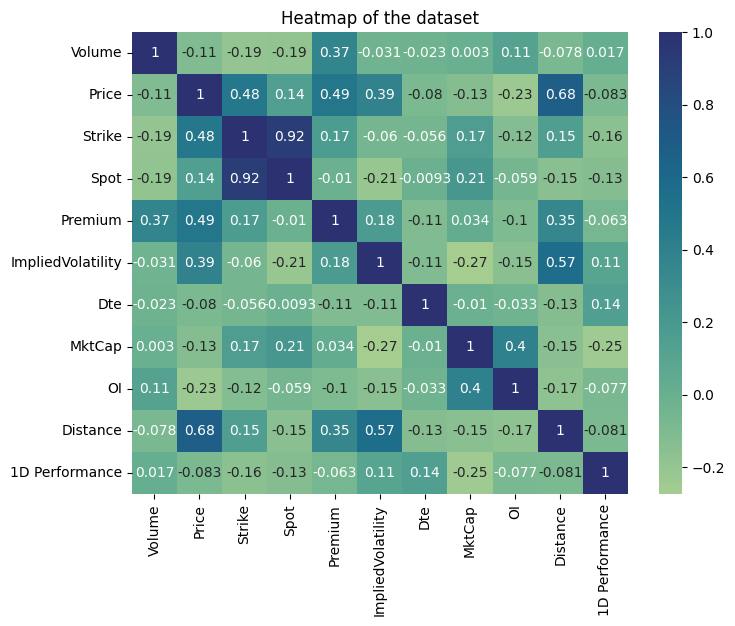

In [202]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(sector_data[['Volume', 'Price', 'Strike', 'Spot', 'Premium','ImpliedVolatility','Dte','MktCap','OI','Distance','1D Performance']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [324]:
# structured data for modeling
structure_data = sector_data.copy()

# save data
structure_data.to_csv('/Users/xonkar/Desktop/Data_Projects/Options/Technology/Structured_Data.csv',index = False)

In [179]:
# Specify the list of column names you want to extract
columns_to_keep = ['Type', 'Volume', 'Price',
       'Side', 'Money', 'CallPut', 'Strike', 'Spot', 'Premium',
       'Color','ImpliedVolatility', 'Dte', 'ER',
       'Uoa', 'Weekly', 'MktCap', 'OI',
       'Distance','1PN']

# Extract the specified columns from the original dataset
necessary_data = sector_data[columns_to_keep]
necessary_data

# Or perform any other analysis on the extracted columns


,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,Color,ImpliedVolatility,Dte,ER,Uoa,Weekly,MktCap,OI,Distance,1PN
0,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,WHITE,0.33,39,F,F,F,1676733000000,16193,3.46,positive
1,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,YELLOW,0.58,32,F,F,F,291151000000,23,9.17,positive
2,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,MAGENTA,0.74,4,F,F,T,365531000000,3918,-3.96,positive
3,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
4,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,YELLOW,0.39,375,F,F,F,140510000000,755,4.51,positive
1299,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,WHITE,0.32,157,F,F,F,2062010000000,13919,10.94,positive
1300,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,WHITE,0.33,157,F,F,F,2062010000000,71667,-0.54,positive
1301,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,WHITE,0.49,11,F,F,F,103126000000,61125,6.06,positive


In [41]:
largest_index = sector_data['Distance'].idxmax()
largest_row = sector_data.loc[largest_index]
print("Row with the largest value:")
print(largest_row)


Row with the largest value:
CreatedDate             2023-01-09 00:00:00
CreatedTime                      2:33:10 PM
Symbol                                 DOCU
Type                                    ML/
Volume                                  290
Price                                 302.3
Side                                      B
Money                                   ITM
CallPut                                 PUT
Strike                                360.0
Spot                                  56.88
Premium                             8766700
ExpirationDate                   2023-01-20
Color                                 WHITE
ImpliedVolatility                       0.0
Dte                                      11
ER                                        F
StockEtf                              STOCK
Sector               Information Technology
Uoa                                       F
Weekly                                    F
MktCap                          10966000000
OI  

The meadian is:  2.18


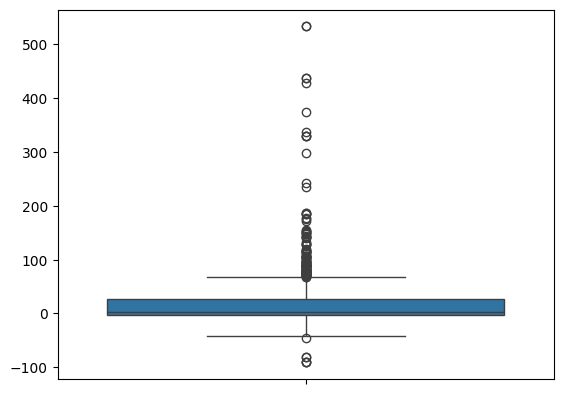

In [42]:
x = sector_data['Distance'].values

ax = sns.boxplot(x)

print('The meadian is: ', sector_data['Distance'].median())

In [43]:
import plotly.graph_objects as go

# Define hover text with only the Symbol column
hover_text = sector_data['Symbol']

# Define colors based on '5D Performance' values
colors = ['red' if p < 0 else 'green' for p in sector_data['5D Performance']]

# Create a trace for the scatter plot
trace = go.Scatter3d(
    x=sector_data['Distance'],
    y=sector_data['Dte'],
    z=sector_data['5D Performance'],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,           # Set color based on '5D Performance' values
        opacity=0.6             # Marker opacity
    ),
    hovertext=hover_text       # Set hover text to show only Symbol
)

# Create layout for the plot
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Distance'),
        yaxis=dict(title='Dte'),
        zaxis=dict(title='Performance')
    ),
    title='3D Scatter Plot: Distance vs Dte vs Performance'
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()


In [44]:
# Create a filter for the desired stocks
desired_stocks = ['DOCU']  # Replace with the stocks you want to filter
# Filter the DataFrame based on the 'Symbol' column
filtered_df = sector_data[sector_data['Symbol'].isin(desired_stocks)]
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
filtered_df


,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2023-01-09,2:46:41 PM,DOCU,ML/,150,20.70,A,ITM,PUT,77.5,56.90,310500,2023-01-20,WHITE,0.99,11,F,STOCK,Information Technology,F,F,10966000000,372,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,36.20,positive,positive,positive,Monday
1,2023-01-09,2:46:41 PM,DOCU,ML/,150,303.40,A,ITM,PUT,360.0,56.90,4551000,2023-01-20,MAGENTA,4.91,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,532.69,positive,positive,positive,Monday
2,2023-01-09,2:46:41 PM,DOCU,ML/,230,243.12,A,ITM,PUT,300.0,56.90,5591750,2023-01-20,YELLOW,4.08,11,F,STOCK,Information Technology,F,F,10966000000,206,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,427.24,positive,positive,positive,Monday
3,2023-01-09,2:46:41 PM,DOCU,ML/,230,23.25,A,ITM,PUT,80.0,56.90,534750,2023-01-20,WHITE,1.13,11,F,STOCK,Information Technology,F,F,10966000000,328,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.02,3.16,4.96,40.60,positive,positive,positive,Monday
4,2023-01-09,2:37:44 PM,DOCU,ML/,500,43.05,B,ITM,PUT,100.0,56.88,2152500,2023-01-20,YELLOW,1.21,11,F,STOCK,Information Technology,F,F,10966000000,438,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,75.81,positive,positive,positive,Monday
5,2023-01-09,2:37:44 PM,DOCU,ML/,1060,53.18,A,ITM,PUT,110.0,56.88,5637300,2023-01-20,WHITE,1.81,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39,positive,positive,positive,Monday
6,2023-01-09,2:37:44 PM,DOCU,ML/,560,133.30,A,ITM,PUT,190.0,56.88,7464800,2023-01-20,YELLOW,3.27,11,F,STOCK,Information Technology,F,F,10966000000,500,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,234.04,positive,positive,positive,Monday
7,2023-01-09,2:33:10 PM,DOCU,ML/,470,213.67,A,ITM,PUT,270.0,56.88,10042700,2024-01-19,YELLOW,1.30,375,F,STOCK,Information Technology,F,F,10966000000,425,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,374.68,positive,positive,positive,Monday
8,2023-01-09,2:33:10 PM,DOCU,ML/,760,53.15,A,ITM,PUT,110.0,56.88,4039400,2023-01-20,WHITE,1.75,11,F,STOCK,Information Technology,F,F,10966000000,2131,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,93.39,positive,positive,positive,Monday
9,2023-01-09,2:33:10 PM,DOCU,ML/,290,302.30,B,ITM,PUT,360.0,56.88,8766700,2023-01-20,WHITE,0.00,11,F,STOCK,Information Technology,F,F,10966000000,400,2023-01-10,2023-01-12,2023-01-16,58.05,58.7,59.72,2.06,3.20,4.99,532.91,positive,positive,positive,Monday


### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

In [181]:
# Get numbers of people who left vs. stayed
print(necessary_data['1PN'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(necessary_data['1PN'].value_counts(normalize=True))



positive    652
negative    651
Name: 1PN, dtype: int64

positive    0.500384
negative    0.499616
Name: 1PN, dtype: float64


In [182]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
result = necessary_data.groupby(['1PN'])['Premium'].agg([np.mean,np.median])

# Remove scientific notation and display as whole numbers
result['mean'] = result['mean'].map('{:.0f}'.format)
result['median'] = result['median'].map('{:.0f}'.format)

# Display the result
print(result)


             mean  median
1PN                      
negative  1498883  393120
positive  1210203  321302


In [186]:
import plotly.graph_objects as go

# Create a cross-tabulation of Color and 5PN
cross_tab = pd.crosstab(necessary_data['Color'], necessary_data['1PN'])

# Define colors for the bars
colors = ['#FF5733', '#28A745']  # Purple for 0 (not left), Red for 1 (left)

# Create traces for each category
traces = []
for i, (column, color) in enumerate(zip(cross_tab.columns, colors)):
    trace = go.Bar(
        x=cross_tab.index,
        y=cross_tab[column],
        name=str(column),
        marker=dict(color=color),
        offsetgroup=i,  # Separate bars for each category
    )
    traces.append(trace)

# Define layout for the plot
layout = go.Layout(
    title='Counts of performance positive vs negative across xxx',
    xaxis=dict(title='Colors'),
    yaxis=dict(title='Performance count'),
    barmode='group',  # Cluster bars instead of stacking
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the interactive plot
fig.show()


In [188]:
necessary_data.groupby(['Color', '1PN']).size()

Color    1PN     
#FF0000  negative      5
         positive      1
MAGENTA  negative     65
         positive     86
WHITE    negative    439
         positive    437
YELLOW   negative    142
         positive    128
dtype: int64

In [196]:
color = necessary_data[(necessary_data['Color'] == 'WHITE') & (necessary_data['1PN'] == 'positive')].reset_index()
color



,index,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,Color,ImpliedVolatility,Dte,ER,Uoa,Weekly,MktCap,OI,Distance,1PN
0,0,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,WHITE,0.33,39,F,F,F,1676733000000,16193,3.46,positive
1,3,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
2,4,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
3,5,SWEEP,100,17.02,A,ITM,PUT,580.0,572.03,170220,WHITE,0.32,11,F,F,F,245899000000,714,1.39,positive
4,7,BLOCK,250,14.85,A,ITM,CALL,100.0,110.91,371250,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,1297,SWEEP,207,6.40,A,ITM,CALL,126.0,130.72,132400,WHITE,0.39,11,F,F,F,2062010000000,3124,-3.61,positive
433,1299,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,WHITE,0.32,157,F,F,F,2062010000000,13919,10.94,positive
434,1300,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,WHITE,0.33,157,F,F,F,2062010000000,71667,-0.54,positive
435,1301,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,WHITE,0.49,11,F,F,F,103126000000,61125,6.06,positive


In [197]:
necessary_data

,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,Color,ImpliedVolatility,Dte,ER,Uoa,Weekly,MktCap,OI,Distance,1PN
0,SWEEP,200,6.75,A,OTM,CALL,235.0,227.14,135000,WHITE,0.33,39,F,F,F,1676733000000,16193,3.46,positive
1,BLOCK,304,3.90,B,OTM,CALL,121.0,110.84,118560,YELLOW,0.58,32,F,F,F,291151000000,23,9.17,positive
2,BLOCK,250,8.46,B,ITM,CALL,150.0,156.19,211500,MAGENTA,0.74,4,F,F,T,365531000000,3918,-3.96,positive
3,SWEEP,500,14.85,B,ITM,CALL,100.0,110.92,742522,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
4,SWEEP,250,14.88,B,ITM,CALL,100.0,110.92,371961,WHITE,0.59,39,F,F,F,291151000000,9468,-9.84,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,BLOCK,1000,21.90,B,OTM,CALL,150.0,143.53,2190000,YELLOW,0.39,375,F,F,F,140510000000,755,4.51,positive
1299,ML/,999,6.15,B,OTM,CALL,145.0,130.70,614555,WHITE,0.32,157,F,F,F,2062010000000,13919,10.94,positive
1300,ML/,999,10.25,BB,ATM,PUT,130.0,130.70,1023805,WHITE,0.33,157,F,F,F,2062010000000,71667,-0.54,positive
1301,ML/,998,4.78,A,ITM,PUT,70.0,66.00,477041,WHITE,0.49,11,F,F,F,103126000000,61125,6.06,positive


In [168]:
necessary_data['1PN'].unique()

array(['positive', 'negative'], dtype=object)

**Label Encoding**

In [199]:
# Copy the dataframe
df_enc = necessary_data.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['1PN'] = (
    df_enc['1PN'].astype('category')
    .cat.set_categories(['negative', 'positive'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,Distance,1PN,Type_BLOCK,Type_ML/,Type_SWEEP,Side_AA,Side_A,Side_N,Side_B,Side_BB,Money_ATM,Money_ITM,Money_OTM,CallPut_CALL,CallPut_PUT,Color_#FF0000,Color_MAGENTA,Color_WHITE,Color_YELLOW,ER_F,ER_T,Uoa_F,Uoa_T,Weekly_F,Weekly_T
0,200,6.75,235.0,227.14,135000,0.33,39,1676733000000,16193,3.46,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0
1,304,3.90,121.0,110.84,118560,0.58,32,291151000000,23,9.17,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
2,250,8.46,150.0,156.19,211500,0.74,4,365531000000,3918,-3.96,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,500,14.85,100.0,110.92,742522,0.59,39,291151000000,9468,-9.84,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
4,250,14.88,100.0,110.92,371961,0.59,39,291151000000,9468,-9.84,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [87]:
necessary_data

,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2,200,6.75,0,2,0,235.0,227.14,135000,2,0.33,39,0,0,0,0,0,1676733000000,16193,0.75,5.01,5.82,3.46,1,1,1,0
1,0,304,3.90,2,2,0,121.0,110.84,118560,3,0.58,32,0,0,0,0,0,291151000000,23,3.65,2.09,3.93,9.17,1,1,1,0
2,0,250,8.46,2,1,0,150.0,156.19,211500,1,0.74,4,0,0,0,0,1,365531000000,3918,1.86,5.71,13.34,-3.96,1,1,1,0
3,2,500,14.85,2,1,0,100.0,110.92,742522,2,0.59,39,0,0,0,0,0,291151000000,9468,3.57,2.01,3.85,-9.84,1,1,1,0
4,2,250,14.88,2,1,0,100.0,110.92,371961,2,0.59,39,0,0,0,0,0,291151000000,9468,3.57,2.01,3.85,-9.84,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,1000,21.90,2,2,0,150.0,143.53,2190000,3,0.39,375,0,0,0,0,0,140510000000,755,2.72,4.23,3.44,4.51,1,1,1,0
1299,1,999,6.15,2,2,0,145.0,130.70,614555,2,0.32,157,0,0,0,0,0,2062010000000,13919,0.02,2.07,4.01,10.94,1,1,1,0
1300,1,999,10.25,3,0,1,130.0,130.70,1023805,2,0.33,157,0,0,0,0,0,2062010000000,71667,0.02,2.07,4.01,-0.54,1,1,1,0
1301,1,998,4.78,0,1,1,70.0,66.00,477041,2,0.49,11,0,0,0,0,0,103126000000,61125,3.11,7.27,8.47,6.06,1,1,1,0


In [203]:
# Isolate the outcome variable
y = df_enc['1PN']
# Display first few rows of the outcome variable
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: 1PN, dtype: int8

In [204]:
# Select the features you want to use in your model
X = df_enc.drop('1PN', axis=1)
# Display the first few rows of the selected features 
X.head()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,Distance,Type_BLOCK,Type_ML/,Type_SWEEP,Side_AA,Side_A,Side_N,Side_B,Side_BB,Money_ATM,Money_ITM,Money_OTM,CallPut_CALL,CallPut_PUT,Color_#FF0000,Color_MAGENTA,Color_WHITE,Color_YELLOW,ER_F,ER_T,Uoa_F,Uoa_T,Weekly_F,Weekly_T
0,200,6.75,235.0,227.14,135000,0.33,39,1676733000000,16193,3.46,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0
1,304,3.90,121.0,110.84,118560,0.58,32,291151000000,23,9.17,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
2,250,8.46,150.0,156.19,211500,0.74,4,365531000000,3918,-3.96,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,500,14.85,100.0,110.92,742522,0.59,39,291151000000,9468,-9.84,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
4,250,14.88,100.0,110.92,371961,0.59,39,291151000000,9468,-9.84,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [277]:
from sklearn.model_selection import train_test_split

# Split the data into training set and testing set without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [278]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [279]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

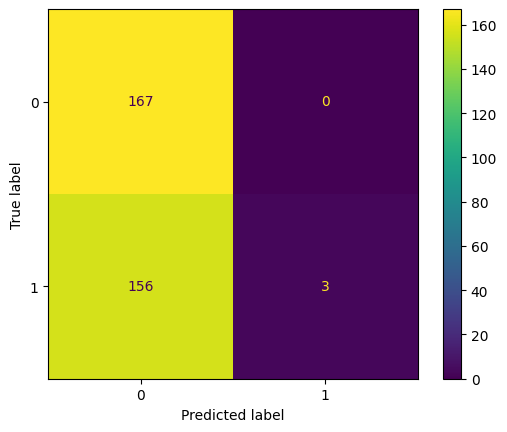

In [280]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

* The upper-left quadrant displays the number of true negatives.
* The upper-right quadrant displays the number of false positives.
* The bottom-left quadrant displays the number of false negatives.
* The bottom-right quadrant displays the number of true positives.

True negatives: The number of flows that performed negative the model accurately predicted performed negative.

False positives: The number of flows that performed negative the model inaccurately predicted as postive.

False negatives: The number of flows that performed positive the model inaccurately predicted negative.

True positives: The number of flows that performed positive the model accurately predicted as positive.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.


0 = negative 1 = positive 

In [215]:
necessary_data['1PN'].value_counts(normalize=True)

positive    0.500384
negative    0.499616
Name: 1PN, dtype: float64

The data is almost perfectly balanced.

In [281]:
# Create classification report for logistic regression model
target_names = ['Flow perform positive', 'Flow perform negative']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

Flow perform positive       0.52      1.00      0.68       167
Flow perform negative       1.00      0.02      0.04       159

             accuracy                           0.52       326
            macro avg       0.76      0.51      0.36       326
         weighted avg       0.75      0.52      0.37       326



In [282]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

Precision: 1.0
Recall: 0.018867924528301886
F1-score: 0.037037037037037035
Accuracy: 0.5214723926380368
ROC AUC Score: 0.5094339622641509


Here's how to interpret the metrics:

Precision:
For the class 'Flow perform positive', precision is 0.52, which means that among all instances predicted as 'Flow perform positive', 52% were actually 'Flow perform positive'.
For the class 'Flow perform negative', precision is 1.00, indicating that all instances predicted as 'Flow perform negative' were actually 'Flow perform negative'.

Recall:
For the class 'Flow perform positive', recall is 1.00, meaning that among all actual instances of 'Flow perform positive', 100% were correctly classified as 'Flow perform positive'.
For the class 'Flow perform negative', recall is 0.02, indicating that only 2% of actual instances of 'Flow perform negative' were correctly classified as 'Flow perform negative'.

F1-score:
F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
For the class 'Flow perform positive', the F1-score is 0.68, which indicates a balance between precision and recall for this class.
For the class 'Flow perform negative', the F1-score is 0.04, suggesting a very low balance between precision and recall for this class.

Support:
Support refers to the number of actual occurrences of each class in the dataset.

Accuracy:
Accuracy is the overall correctness of the model, calculated as the ratio of correctly predicted instances to the total number of instances.

Macro avg:
Macro avg calculates the average of the metrics (precision, recall, F1-score) for each class, without considering class imbalance.

Weighted avg:
Weighted avg calculates the weighted average of the metrics, where each average is weighted by the number of samples in each class.

In summary, while the model performs well in predicting the 'Flow perform positive' class, it performs poorly in predicting the 'Flow perform negative' class, as indicated by the low recall and F1-score for that class.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

In [217]:
# Isolate the outcome variable
y = df_enc['1PN']
# Display first few rows of the outcome variable
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: 1PN, dtype: int8

In [218]:
# Select the features you want to use in your model
X = df_enc.drop('1PN', axis=1)
# Display the first few rows of the selected features 
X.head()

,Volume,Price,Strike,Spot,Premium,ImpliedVolatility,Dte,MktCap,OI,Distance,Type_BLOCK,Type_ML/,Type_SWEEP,Side_AA,Side_A,Side_N,Side_B,Side_BB,Money_ATM,Money_ITM,Money_OTM,CallPut_CALL,CallPut_PUT,Color_#FF0000,Color_MAGENTA,Color_WHITE,Color_YELLOW,ER_F,ER_T,Uoa_F,Uoa_T,Weekly_F,Weekly_T
0,200,6.75,235.0,227.14,135000,0.33,39,1676733000000,16193,3.46,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0
1,304,3.90,121.0,110.84,118560,0.58,32,291151000000,23,9.17,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0
2,250,8.46,150.0,156.19,211500,0.74,4,365531000000,3918,-3.96,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,500,14.85,100.0,110.92,742522,0.59,39,291151000000,9468,-9.84,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0
4,250,14.88,100.0,110.92,371961,0.59,39,291151000000,9468,-9.84,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0


In [298]:
# Split the data into training set and testing set without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Decision tree - Round 1
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [299]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [300]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 1.07 s, sys: 52.1 ms, total: 1.12 s
Wall time: 1.34 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Identify the optimal values for the decision tree parameters.

In [301]:
# Check best parameters
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6}

Identify the best AUC score achieved by the decision tree model on the training set.

In [302]:
# Check best AUC score on CV
tree1.best_score_

0.9475164346418191

This is a strong AUC score, which shows that this model can predict flow that perform negative.

Next, we can write a function that will help us extract all the scores from the grid search. 

In [303]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [304]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.883333,0.888474,0.883951,0.882289,0.947516


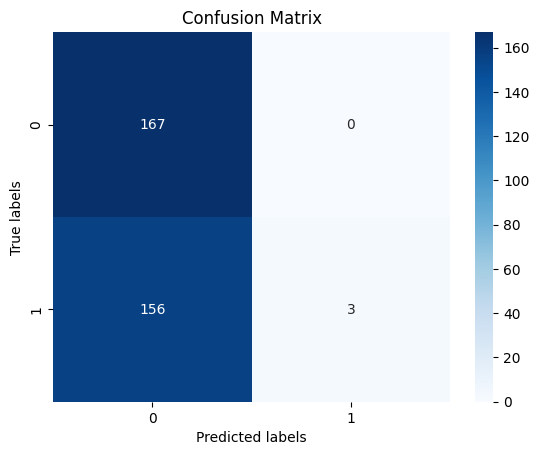

In [305]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


All of these scores from the decision tree model are strong indicators of good model performance. 

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. We could construct a random forest model next.

#### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [306]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a single scoring metric
scoring = 'roc_auc'

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [307]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 4min 26s, sys: 5.1 s, total: 4min 31s
Wall time: 4min 40s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc', scoring='roc_auc')

In [308]:
# Check best AUC score on CV
rf1.best_score_

0.9842126110543963

In [309]:
# Check best params
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [313]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# 1. Extract the best estimator from GridSearchCV
best_rf = rf1.best_estimator_

# 2. Use the best estimator to make predictions on the test set
y_pred = best_rf.predict(X_test)

# 3. Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Note: Since RandomForestClassifier doesn't have a built-in predict_proba() method, you can't directly compute AUC using predicted probabilities.
# Instead, you can use the roc_auc_score function to calculate the AUC score based on predicted labels.
auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy:", accuracy)
print("AUC Score:", auc)


Precision: 0.9281437125748503
Recall: 0.9748427672955975
F1-score: 0.9509202453987731
Accuracy: 0.950920245398773
AUC Score: 0.9514932399352238


In [314]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [315]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.928144,0.974843,0.95092,0.95092,0.951493


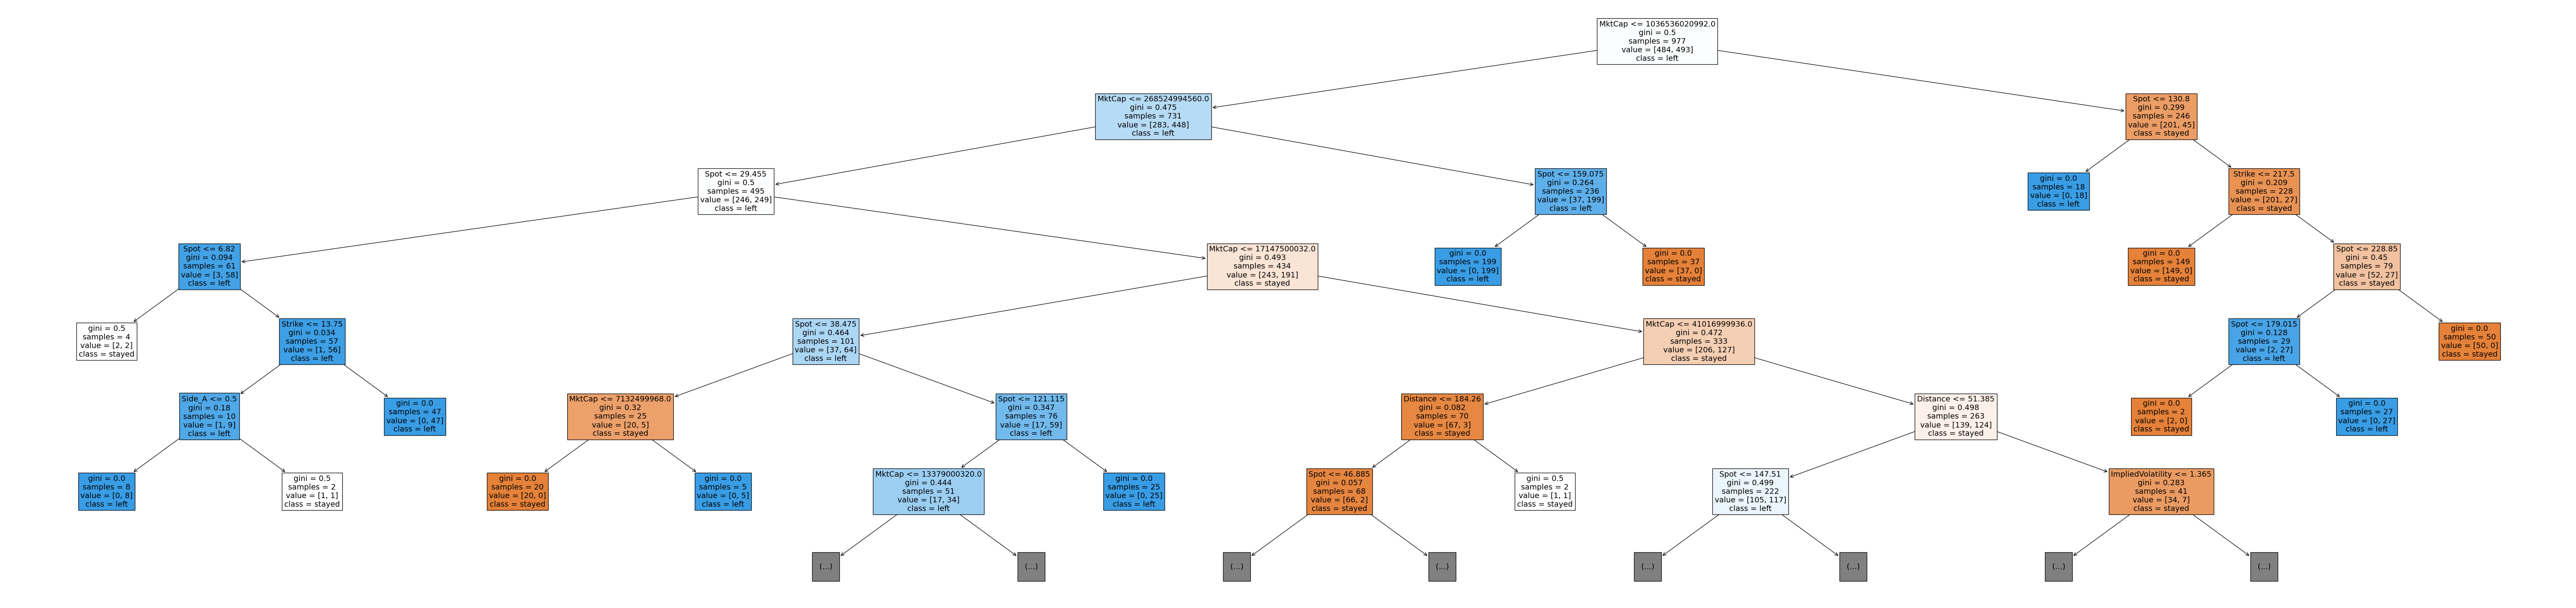

In [317]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [318]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
Spot,0.470699
MktCap,0.429038
Strike,0.031847
Distance,0.030074
OI,0.028459
ImpliedVolatility,0.007227
Side_A,0.002084
Volume,0.000571


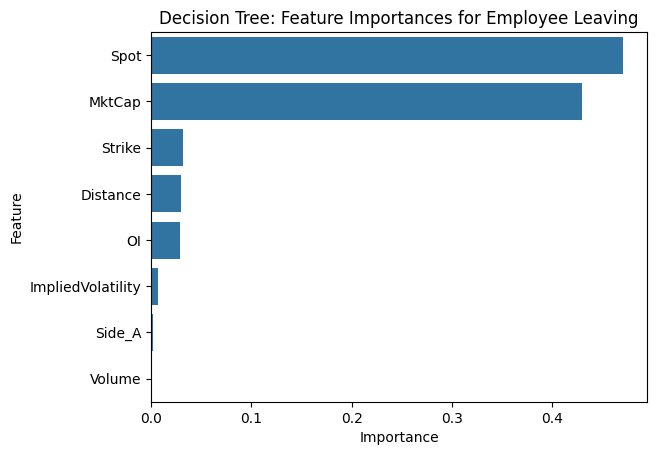

In [319]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

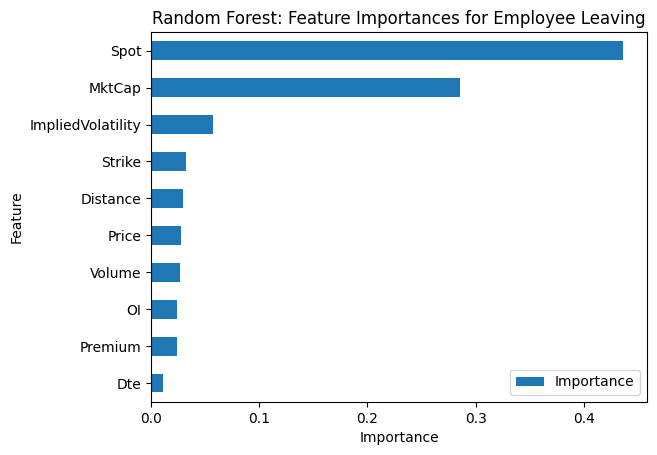

In [320]:
# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

In [ ]:
# Assuming 'new_data' contains your new data for prediction
# Preprocess the new data
# ... (apply the same preprocessing steps as you did for training data)

# Load the trained model
best_rf_model = rf1.best_estimator_

# Make predictions on the new data
new_data_predictions = best_rf_model.predict(new_data)

# You can also use predict_proba() if you need probabilities
# new_data_probabilities = best_rf_model.predict_proba(new_data)

# Now 'new_data_predictions' contains the predicted labels for the new data
# You can use these predictions for whatever downstream task you have


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [268]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

scoring = 'accuracy'  # For classification tasks
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [269]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8833281004709577


In [271]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate ROC AUC score (for binary classification)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


Precision: 0.8390804597701149
Recall: 0.9182389937106918
F1-score: 0.8768768768768769
Accuracy: 0.8742331288343558
ROC AUC Score: 0.8752871615260046


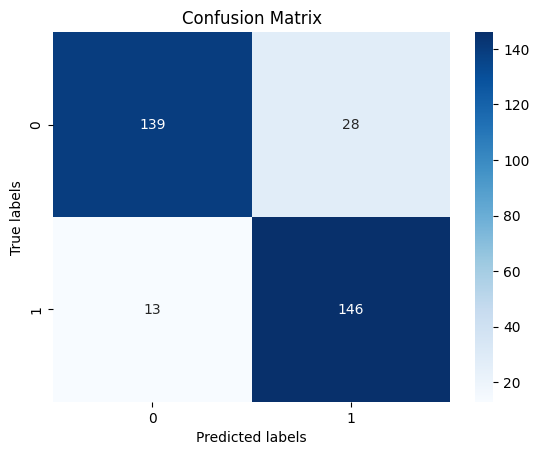

In [273]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [274]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       167
           1       0.84      0.92      0.88       159

    accuracy                           0.87       326
   macro avg       0.88      0.88      0.87       326
weighted avg       0.88      0.87      0.87       326



In [237]:
print(tree1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.883333  0.888474  0.883951  0.882289  0.947516


## Unusual Flows

In [49]:
# Count the occurrences of each stock symbol
symbol_counts = sector_data['Symbol'].value_counts()

# Filter symbols that appear 5 times or less
unusal_flow = symbol_counts[symbol_counts <= 3].index

# Filter the DataFrame based on the desired symbols
unusal_flow_list = sector_data[sector_data['Symbol'].isin(unusal_flow)]

# Reset the index
unusal_flow_list = unusal_flow_list.reset_index(drop=True)

# Display the filtered DataFrame
unusal_flow_list


# we can do it unusual calls and puts 

,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2023-01-09,3:56:17 PM,OLED,ML/,200,7.20,A,ITM,CALL,110.0,115.53,144000,2023-01-20,WHITE,0.48,11,F,STOCK,Information Technology,F,F,5282000000,255,2023-01-10,2023-01-12,2023-01-16,125.08,126.87,127.04,8.27,9.82,9.96,-4.79,positive,positive,positive,Monday
1,2023-01-09,3:56:17 PM,OLED,ML/,200,9.90,B,ITM,CALL,110.0,115.53,198040,2023-02-17,YELLOW,0.45,39,F,STOCK,Information Technology,F,F,5282000000,11,2023-01-10,2023-01-12,2023-01-16,125.08,126.87,127.04,8.27,9.82,9.96,-4.79,positive,positive,positive,Monday
2,2023-01-09,3:52:53 PM,MSTR,ML/,188,5.94,A,OTM,PUT,160.0,174.24,111672,2023-01-20,WHITE,1.02,11,F,STOCK,Information Technology,F,F,1813000000,847,2023-01-10,2023-01-12,2023-01-16,190.00,210.17,235.92,9.04,20.62,35.40,-8.18,positive,positive,positive,Monday
3,2023-01-09,3:29:35 PM,ROK,SWEEP,164,16.09,A,ATM,PUT,270.0,271.57,263820,2023-04-21,YELLOW,0.31,101,F,STOCK,Information Technology,F,F,30722000000,27,2023-01-10,2023-01-12,2023-01-16,271.66,281.41,282.19,0.03,3.62,3.91,-0.58,positive,positive,positive,Monday
4,2023-01-09,3:16:30 PM,BILL,SWEEP,196,9.29,A,OTM,PUT,95.0,100.67,182117,2023-02-17,WHITE,0.95,39,F,STOCK,Information Technology,F,F,9984000000,240,2023-01-10,2023-01-12,2023-01-16,101.65,104.31,106.55,0.97,3.62,5.84,-5.63,positive,positive,positive,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2023-01-09,9:56:48 AM,MRVL,SWEEP,1000,1.28,A,OTM,CALL,45.0,37.83,128000,2023-03-17,WHITE,0.54,66,F,STOCK,Information Technology,F,F,30800000000,6347,2023-01-10,2023-01-12,2023-01-16,37.01,39.31,41.03,-2.18,3.90,8.45,18.94,negative,positive,positive,Monday
65,2023-01-09,9:56:26 AM,KLAC,SWEEP,136,9.30,A,OTM,CALL,470.0,411.92,126475,2023-03-17,YELLOW,0.39,66,F,STOCK,Information Technology,F,F,56346000000,70,2023-01-10,2023-01-12,2023-01-16,416.27,419.07,415.95,1.06,1.74,0.98,14.10,positive,positive,positive,Monday
66,2023-01-09,9:55:43 AM,IRM,SWEEP,200,5.60,BB,ITM,PUT,55.0,50.96,111981,2023-04-21,YELLOW,0.27,101,F,STOCK,Information Technology,F,F,14736000000,57,2023-01-10,2023-01-12,2023-01-16,50.16,52.15,52.32,-1.57,2.34,2.67,7.93,negative,positive,positive,Monday
67,2023-01-09,9:45:53 AM,CLFD,BLOCK,265,10.00,A,ITM,CALL,95.0,97.34,265000,2023-02-17,YELLOW,0.69,39,F,STOCK,Information Technology,F,F,1328000000,18,2023-01-10,2023-01-12,2023-01-16,94.48,83.38,78.84,-2.94,-14.34,-19.01,-2.41,negative,negative,negative,Monday


In [50]:
unusal_flow_list['Symbol'].unique()

array(['OLED', 'MSTR', 'ROK', 'BILL', 'SWKS', 'AMKR', 'DDOG', 'RAMP',
       'OKTA', 'WK', 'FTNT', 'CSIQ', 'WDAY', 'HOOD', 'AMBA', 'STX',
       'KLAC', 'MDB', 'ENV', 'MBLY', 'APPS', 'TEAM', 'CSCO', 'MARA',
       'MELI', 'PI', 'EA', 'TTD', 'TWLO', 'TXN', 'FTDR', 'CARS', 'AEHR',
       'MRVL', 'ACN', 'VNET', 'IRM', 'CLFD'], dtype=object)

In [51]:
# Group by 'CallPut', 'Money', and 'Side' and calculate the mean of '5D Performance'
mean_performance_by_group = unusal_flow_list.groupby(['CallPut', 'Money', 'Side'])['5D Performance'].mean().reset_index()

# Create a bar chart using Plotly Express
fig = px.bar(mean_performance_by_group, x='Side', y='5D Performance', color='Money', barmode='group',
             facet_row='CallPut', title='Mean 5D Performance by CallPut, Money, and Side')

# Show the plot
fig.show()

In [52]:
unusal_flow_list.groupby(['CallPut', 'Money'])['5D Performance'].mean()


CallPut  Money
CALL     ATM      9.156667
         ITM      7.989333
         OTM      3.567143
PUT      ATM      2.285000
         ITM      8.047500
         OTM      7.493684
Name: 5D Performance, dtype: float64

In [53]:
sector_data.groupby(['CallPut', 'Money'])['5D Performance'].mean()


CallPut  Money
CALL     ATM      6.672338
         ITM      4.303900
         OTM      4.920291
PUT      ATM      5.804872
         ITM      5.044488
         OTM      6.412336
Name: 5D Performance, dtype: float64

**Comparing overall sector average performance with unsual flows average performance,
and unusual flow has higher performance. In order to avoid its seasonal performance, 
add more data from different dates and months to confirm the significanse of unusual flows**

## Individual Stock Searching

In [54]:
# Create a filter for the desired stocks
desired_stocks = ['ACN']  # Replace with the stocks you want to filter

In [55]:
# Create a filter for the desired stocks
desired_stocks = ['ACN']  # Replace with the stocks you want to filter
# Filter the DataFrame based on the 'Symbol' column
filtered_df = sector_data[sector_data['Symbol'].isin(desired_stocks)]
filtered_df = filtered_df.reset_index(drop=True)

# Display the filtered DataFrame
filtered_df


,CreatedDate,CreatedTime,Symbol,Type,Volume,Price,Side,Money,CallPut,Strike,Spot,Premium,ExpirationDate,Color,ImpliedVolatility,Dte,ER,StockEtf,Sector,Uoa,Weekly,MktCap,OI,1D After,3D After,5D After,1D Price,3D Price,5D Price,1D Performance,3D Performance,5D Performance,Distance,1PN,3PN,5PN,WeekDay
0,2023-01-09,10:21:50 AM,ACN,BLOCK,155,10.2,N,ATM,CALL,275.0,274.39,158100,2023-02-17,WHITE,0.29,39,F,STOCK,Information Technology,F,F,177379000000,240,2023-01-10,2023-01-12,2023-01-16,274.93,283.84,284.88,0.2,3.44,3.82,0.22,positive,positive,positive,Monday


* SWEEP B OTM PUT - DOWN NEXT DAYS / UP NEXT WEEKS / DOWN BELOW STRIKE PRICE BY EXPIRATION

* SWEEP A ITM PUT LONG EXPIRATION- UP NEXT DAY / UP TO STRIKE PRICE IN THREE MONTHS 
* BLOCK/SWEEP A ITM CALL - DOWN NEXT DAYS

* Block B OTM CALL 71 FFF OI6867 - write calls collect premium

* ML/   B OTM CALL 163 FFF OI25 - write calls 
* ML/   B ITM CALL 163 FFF OI1237 - Write calls 

**What are my assumptions?**
* Unusual flows - only few prints + premium above $250k + AA + reasonable DTE + No earnings + OTM 
* I want to get the average return of differnt Types, CallPuts, Color, 

In [56]:
average_performance_by_type = sector_data.groupby('Type')['5D Performance'].mean()
average_performance_by_type

Type
BLOCK    5.322782
ML/      4.928240
SWEEP    5.815570
Name: 5D Performance, dtype: float64

In [57]:
callput_by_group = sector_data.groupby(['Type', 'CallPut'])['CallPut'].count()

callput_by_group

Type   CallPut
BLOCK  CALL       138
       PUT        146
ML/    CALL       195
       PUT        447
SWEEP  CALL       219
       PUT        158
Name: CallPut, dtype: int64

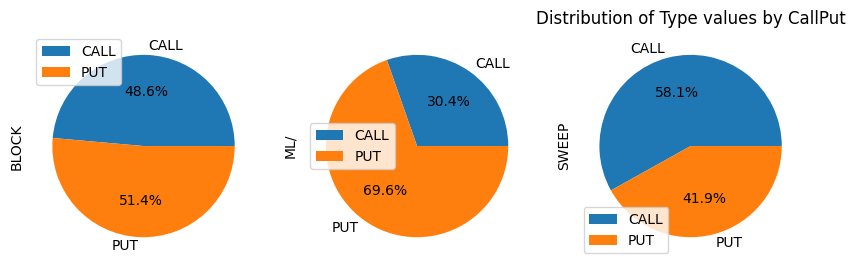

In [58]:
callput_by_group = sector_data.groupby(['CallPut', 'Type'])['Type'].count()

# Plotting the pie chart
callput_by_group.unstack().plot(kind='pie', subplots=True, figsize=(10, 6), autopct='%1.1f%%')

# Adding title
plt.title('Distribution of Type values by CallPut')

# Display the plot
plt.show()


In [59]:
import plotly.graph_objects as go
import plotly.express as px

# Define the range for 'Premium' to consider as non-outliers
premium_min = sector_data['Premium'].quantile(0.05)  # Adjust as needed
premium_max = sector_data['Premium'].quantile(0.95)  # Adjust as needed

# Filter out outliers based on 'Premium'
filtered_sector_data = sector_data[(sector_data['Premium'] >= premium_min) & (sector_data['Premium'] <= premium_max)]

fig = px.scatter(filtered_sector_data, 
                 x='5D Performance', 
                 y='Premium', 
                 color='Premium', 
                 size='Premium', 
                 hover_data=['Dte'])

fig.add_hline(y=0, line_dash="dot", line_color="grey")  # Add horizontal line at y=0

fig.update_layout(plot_bgcolor="white")
fig.show()


In [60]:
# Assuming required_data is your DataFrame
call_data = sector_data[sector_data['CallPut'] == 'CALL'].reset_index(drop=True)
put_data = sector_data[sector_data['CallPut'] == 'PUT'].reset_index(drop=True)


what percentage of the call is above 0 and below 0 
how about call + aa + short time 

Feature engineering:
* OTM/ATM/ITM
* Premium 
* Expiration time 

